In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
df=pd.read_csv('insurance_data_logreg.csv')
x_train,x_test,y_train,y_test=train_test_split(df[['Age']],df['Bought_Insurance'],test_size=0.2,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((160, 1), (40, 1), (160,), (40,))

In [6]:
scaler=MinMaxScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)
model=LogisticRegression()
model.fit(x_train_scaled,y_train)
y_pred=model.predict(x_test_scaled)
x_train_scaled[:5],y_train.head()

(array([[0.82692308],
        [0.61538462],
        [0.88461538],
        [0.71153846],
        [0.78846154]]),
 79     1
 197    1
 38     1
 24     1
 122    0
 Name: Bought_Insurance, dtype: int64)

/home/paal/miniconda3/envs/pyenv/lib/python3.10/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


<Axes: >

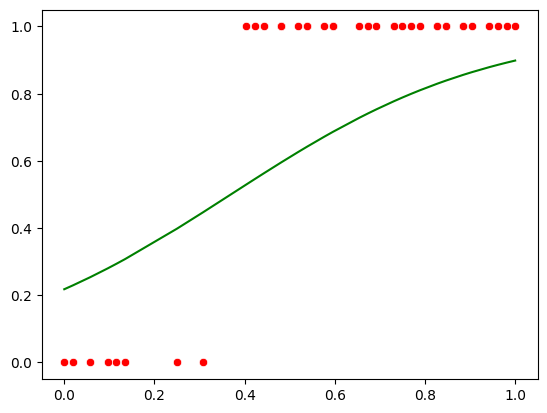

In [7]:
from matplotlib import pyplot as plt
import seaborn as sns
x_sorted=np.sort(x_test_scaled,axis=0)
x_sorted_df=pd.DataFrame(x_sorted,columns=['Age'])
y_proba=model.predict_proba(x_sorted_df)[:,1]
plt.plot(x_sorted,y_proba,color='green')
sns.scatterplot(x=x_test_scaled[:,0],y=y_pred,color='red')

The one above mathi, mettethu menakedaa


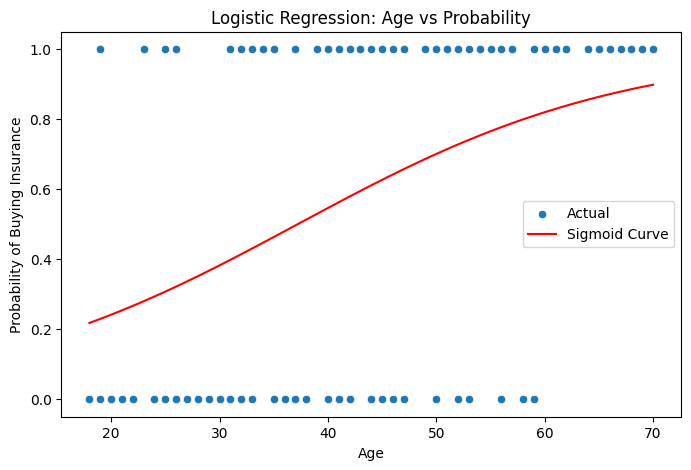

In [11]:
feature_grid = np.linspace(x_train_scaled.min(), x_train_scaled.max(), 100).reshape(-1, 1)
prob_grid = model.predict_proba(feature_grid)[:, 1]

# Plot actual points: scatter of age (unscaled) vs bought_insurance
plt.figure(figsize=(8, 5))
sns.scatterplot(x=x_train.values.flatten(),y=y_train, label='Actual')

# Plot sigmoid curve: age (unscaled) vs predicted probability
feature_grid_unscaled = scaler.inverse_transform(feature_grid)
plt.plot(feature_grid_unscaled, prob_grid, color='red', label='Sigmoid Curve')

plt.xlabel('Age')
plt.ylabel('Probability of Buying Insurance')
plt.title('Logistic Regression: Age vs Probability')
plt.legend()
plt.show()

This is menakeddu


In [13]:
from sklearn.metrics import confusion_matrix, classification_report
cm=confusion_matrix(y_test,y_pred)
print('Confusion Matrix:\n',cm)
print('\nClassification Report:\n',classification_report(y_test,y_pred))


Confusion Matrix:
 [[ 5  3]
 [ 3 29]]

Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.62      0.62         8
           1       0.91      0.91      0.91        32

    accuracy                           0.85        40
   macro avg       0.77      0.77      0.77        40
weighted avg       0.85      0.85      0.85        40

